# 1) Imports

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from os import walk
from os.path import join, exists
from utils import nomes, save_dataframe_as_feather, decode_rle

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, OPTICS, KMeans

import tensorflow
from tensorflow.keras.preprocessing import image

# 2) Carregar dataset

In [4]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image,width,height
86950,case114_day17_slice_0086,stomach,None,.\train\case114\case114_day17\scans\slice_0086...,360,310
4655,case43_day0_slice_0065,large_bowel,None,.\train\case43\case43_day0\scans\slice_0065_26...,266,266
93046,case102_day0_slice_0092,stomach,33007 9 33364 14 33723 17 34082 19 34441 21 34...,.\train\case102\case102_day0\scans\slice_0092_...,360,310
100927,case139_day0_slice_0126,small_bowel,None,.\train\case139\case139_day0\scans\slice_0126_...,234,234
85598,case2_day2_slice_0017,small_bowel,None,.\train\case2\case2_day2\scans\slice_0017_266_...,266,266
...,...,...,...,...,...,...
6552,case35_day12_slice_0060,small_bowel,26924 6 27198 10 27474 13 27750 14 28026 16 28...,.\train\case35\case35_day12\scans\slice_0060_2...,276,276
78838,case111_day19_slice_0093,small_bowel,26470 5 26732 13 26996 21 27250 6 27259 31 275...,.\train\case111\case111_day19\scans\slice_0093...,266,266
87238,case145_day0_slice_0090,small_bowel,33743 5 34102 7 34461 9 34773 1 34820 11 35130...,.\train\case145\case145_day0\scans\slice_0090_...,360,310
89107,case85_day21_slice_0125,stomach,None,.\train\case85\case85_day21\scans\slice_0125_2...,266,266


# 3) Clusterizar imagens p/ gerar exemplos de teste

In [5]:
distancia_vizinho = 1
n_vizinhos = 25

def new_cluster_model():
	return DBSCAN(
		eps=distancia_vizinho,
		min_samples=n_vizinhos,
		n_jobs=-2
	)

	# return KMeans(
	# 	n_clusters=10,
	# )

In [6]:
largura, altura = 100, 100


class Counter:
    _count = 0
    @staticmethod
    def get():
        Counter._count += 1
        return Counter._count
    
    @staticmethod
    def reset():
        Counter._count = 0


cluster_model = new_cluster_model()

def clustering(img_path):
    img = image.load_img(
        img_path,
        target_size=(largura, altura),
        color_mode='grayscale'
    )

    # Para realizar o clustering de uma imagem
    # Precisa de uma matriz das posicoes + uma dimensao para cores
    image_as_arr = image.img_to_array(img).reshape(largura * altura, 1)

    print(Counter.get(), end=', ')
    
    return cluster_model.fit_predict(image_as_arr)

In [7]:
# Limitar os dados por questão de tempo
# limite_dados = 10000
# limite_dados = 1000
# limite_dados = 100
limite_dados = 25

df_dados = pd.concat([
	dataset[dataset['class'] == 'stomach'].sample(limite_dados),
	dataset[dataset['class'] == 'small_bowel'].sample(limite_dados),
	dataset[dataset['class'] == 'large_bowel'].sample(limite_dados),
])

df_dados['class'].value_counts()

df_dados['clusters'] = df_dados['image'].apply(clustering)
df_dados.head()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 

,id,class,segmentation,image,width,height,clusters
51742,case33_day0_slice_0133,stomach,None,.\train\case33\case33_day0\scans\slice_0133_26...,266,266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22723,case147_day18_slice_0005,stomach,None,.\train\case147\case147_day18\scans\slice_0005...,266,266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15522,case36_day6_slice_0040,stomach,25718 13 25982 17 26246 20 26511 21 26776 23 2...,.\train\case36\case36_day6\scans\slice_0040_26...,266,266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
114430,case133_day23_slice_0043,stomach,37289 8 37648 12 38007 15 38366 17 38725 19 39...,.\train\case133\case133_day23\scans\slice_0043...,360,310,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
75251,case119_day0_slice_0137,stomach,None,.\train\case119\case119_day0\scans\slice_0137_...,360,310,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Visualização

Número clusters: 65
Tem segmentação: True


TypeError: img_to_array() got an unexpected keyword argument 'size'

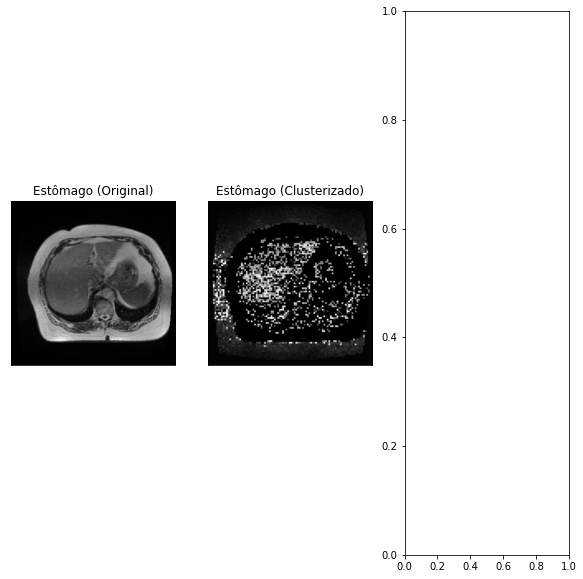

In [42]:
linha = df_dados[df_dados['segmentation'].notnull()].sample(n=1).iloc[0]

print('Número clusters:', max(linha['clusters']))
print('Tem segmentação:', bool(linha['segmentation']))

# Desenhar
fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

ax = plt.subplot(1, 3, 1)
ax.imshow(plt.imread(linha['image']), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Original)')

ax = plt.subplot(1, 3, 2)
ax.imshow(linha['clusters'].reshape(largura, altura), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Clusterizado)')

if linha['segmentation']:
	segmentation = linha['segmentation']
	segmentation_rle = decode_rle(segmentation, shape=(linha['width'], linha['height']))
	ax = plt.subplot(1, 3, 3)
	# TODO Alterar tamaho da imagem de segmentação ou entao clusetrizar com tamaho original
	# segmentation_rle = image.l(image.array_to_img(segmentation_rle.reshape(segmentation_rle.shape[0], segmentation_rle.shape[1], 1)), size=(largura, altura))

	ax.imshow(np.array(segmentation_rle).reshape(largura, altura), cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.title(nomes[linha['class']] + ' (Clusterizado + Segmentação)')
else:
	exit(1)


plt.show()

max_clusters = 10
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
fig.patch.set_alpha(1)
for i in range(max_clusters):
	cluster_selecionado = i
	d = pd.DataFrame(linha['clusters']).applymap(lambda x: 1 if x == cluster_selecionado else 0)
	d = np.array(d.values).reshape(largura, altura)
	axs[i//5][i%5].imshow(d, cmap='gray')
	axs[i//5][i%5].set_title(f'Cluster: {cluster_selecionado}')
	axs[i//5][i%5].set_xticks([])
	axs[i//5][i%5].set_yticks([])

plt.tight_layout()

# plt.title(nomes[linha['class']] + ' (Segmentado)')
# plt.show()

In [ ]:
# save_dataframe_as_feather(df_dados, 'train_imagens_clusters.feather')